**Task 2: Predict Future Stock Prices (Short-Term)**

In [8]:
#Installing Important Packages
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Getting TESLA Historic Data:**

To get the historical market data such as stock prices we can use the history() method. Fetching Tesla’s stock prices for the maximum available period and displaying it in a tablular format.

In [18]:
data= yf.Ticker("TSLA")
historic_data=data.history(period="max")
historic_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-12 00:00:00-04:00,323.079987,332.559998,316.859985,319.109985,105127500,0.0,0.0
2025-06-13 00:00:00-04:00,313.970001,332.989990,313.299988,325.309998,128964300,0.0,0.0
2025-06-16 00:00:00-04:00,331.290009,332.049988,326.410004,329.130005,83925900,0.0,0.0


Preparing data for a machine learning or time series forecasting task, where the goal is likely to predict the next day's closing price of a stock or financial instrument.

In [26]:
#Creating Features and Target
historic_data['Target_Close']=historic_data['Close'].shift(-1)

historic_data.dropna(inplace=True) #drop the rows with null values

In [27]:
historic_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target_Close
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,1.588667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,1.464000
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,1.280000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,1.074000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,1.053333
...,...,...,...,...,...,...,...,...
2025-06-10 00:00:00-04:00,314.940002,327.829987,310.670013,326.089996,151256500,0.0,0.0,326.429993
2025-06-11 00:00:00-04:00,334.399994,335.500000,322.500000,326.429993,122611400,0.0,0.0,319.109985
2025-06-12 00:00:00-04:00,323.079987,332.559998,316.859985,319.109985,105127500,0.0,0.0,325.309998


In [ ]:
#Removes Dividends and Stock Splits Features
historic_data.drop(['Dividends','Stock Splits'], axis=1, inplace=True)

In [31]:
historic_data

,Open,High,Low,Close,Volume,Target_Close
Date,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333
...,...,...,...,...,...,...
2025-06-10 00:00:00-04:00,314.940002,327.829987,310.670013,326.089996,151256500,326.429993
2025-06-11 00:00:00-04:00,334.399994,335.500000,322.500000,326.429993,122611400,319.109985
2025-06-12 00:00:00-04:00,323.079987,332.559998,316.859985,319.109985,105127500,325.309998


In [32]:
#Data Info
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3765 entries, 2010-06-29 00:00:00-04:00 to 2025-06-16 00:00:00-04:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3765 non-null   float64
 1   High          3765 non-null   float64
 2   Low           3765 non-null   float64
 3   Close         3765 non-null   float64
 4   Volume        3765 non-null   int64  
 5   Target_Close  3765 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 205.9 KB


In [33]:
#Numeric Summary
historic_data.describe()

,Open,High,Low,Close,Volume,Target_Close
count,3765.000000,3765.000000,3765.000000,3765.000000,3.765000e+03,3765.000000
mean,88.593070,90.581117,86.465378,88.567852,9.707529e+07,88.651452
std,113.848771,116.450259,110.987632,113.754319,7.689789e+07,113.806031
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,1.053333
25%,12.446667,12.764667,12.183333,12.506000,5.014650e+07,12.534667
50%,18.799999,19.118668,18.466667,18.807333,8.328810e+07,18.817333
75%,191.456665,196.360001,186.339996,191.300003,1.225740e+08,191.333328
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,479.859985


In [35]:
historic_data.shape

(3765, 6)

**Target Variable Splitting:**

In [37]:
#split data to be used in model

x=historic_data.drop('Target_Close', axis=1) #Grabs everything except Target Close Variable

#create a target variable
y=historic_data['Target_Close'] #y is the column we're trying to predict


In [38]:
x.shape

(3765, 5)

In [39]:
y.shape

(3765,)

**Train a Linear Regression or Random Forest model**

In [36]:
!pip install scikit-learn

In [53]:
from sklearn.preprocessing import StandardScaler

In [42]:
pre_process=StandardScaler().fit(x)
x_transform=pre_process.fit_transform(x)

In [44]:
# x Represents the Features
x_transform.shape
x_transform

array([[-0.76714049, -0.76364159, -0.76862055, -0.76468954,  2.39855359],
       [-0.76316394, -0.76053828, -0.76516025, -0.7647247 ,  2.09046781],
       [-0.76362659, -0.76311483, -0.76698051, -0.76582078,  0.34084412],
       ...,
       [ 2.05990861,  2.07823516,  2.07613413,  2.02693628,  0.10472695],
       [ 1.97987968,  2.08192815,  2.04405424,  2.08144706,  0.41474803],
       [ 2.13203159,  2.07385494,  2.16219135,  2.11503272, -0.17102075]])

In [56]:
from sklearn.model_selection import train_test_split
#use x and y variables to split training data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size=.20, random_state=101)

In [57]:
from sklearn.linear_model import LinearRegression

#create instance  of the model
lin_reg = LinearRegression()

#train the model
lin_reg.fit(x_train, y_train)

LinearRegression()

**Model Testing:**

In [58]:
#Prediction
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(753,)
[ 13.78067408   2.11786738  14.63789789  15.2355556   21.43515078
 426.29822011   2.6462869  182.28096304  14.72450405  23.1757852
  21.57119554   1.26870499  13.88627621  13.42471898   1.68502726
  23.45379227  20.85534286 222.53197824 304.02358834  20.86878772
   1.33051136  22.0873419  109.40035178  12.03103038 142.031737
 182.79154948  17.56013667  16.77726459  10.07091603   2.13964383
  13.85720973   2.02582307   1.70348434   1.66511565   2.14251725
   1.88981848  16.72386823  13.79888365  17.59236225  15.40831345
 239.78887012  14.05914501  12.3198745   17.4537545   14.59842913
 176.05510024 239.9053432    2.56281021  16.34234965   1.5293014
 351.39133885 290.53084738  15.61709632  15.09302802  22.87685884
  15.94029665   1.55855705  16.00002366  15.63101351 194.43367225
 201.05522524 100.30838943 138.82147007 177.68801102   3.359719
 417.67182512   1.58561149  16.26613388 340.42839232  17.50254022
  18.62771862   1.86239262   1.8773996  140.41892954 196.35410714
   2.6441

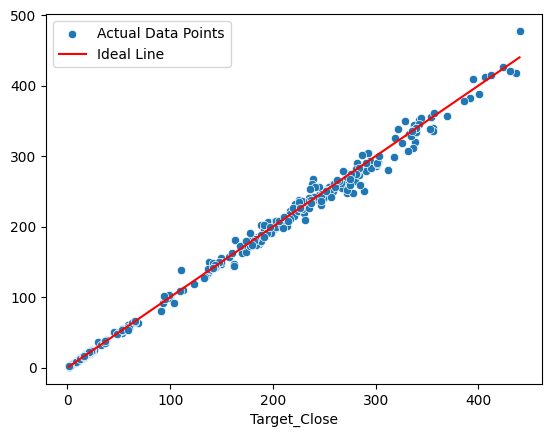

In [59]:
sns.scatterplot(x=y_test, y=y_pred, label="Actual Data Points")
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],label="Ideal Line",color="red")
plt.legend()
plt.show()

**The Figure Shows That The Points are close to the red line which means that it is good prediction in which both actual and predicted values are close to each other**

In [60]:
import numpy as np
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
         13.65 |         13.78
          2.16 |          2.12
         14.73 |         14.64
         15.06 |         15.24
         21.15 |         21.44
        424.07 |        426.30
          2.34 |          2.65
        179.82 |        182.28
         14.31 |         14.72
         22.73 |         23.18
         19.65 |         21.57
          1.32 |          1.27
         14.25 |         13.89
         13.03 |         13.42
          1.66 |          1.69
         23.90 |         23.45
         21.88 |         20.86
        216.50 |        222.53
        292.13 |        304.02
         21.51 |         20.87
          1.34 |          1.33
         22.74 |         22.09
        112.71 |        109.40
         11.68 |         12.03
        144.67 |        142.03
        182.58 |        182.79
         17.40 |         17.56
         16.80 |         16.78
         10.09 |         10.07
          2.14 |          2.14
     